<a href="https://colab.research.google.com/github/eric-pierce/MSDS-422-HW/blob/master/epierce_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - MSDS 422 Assignment 1 - Eric Pierce
This notebook was based on the "Jump-Start Example: Python analysis of MSPA Software Survey" document supplied for 422


Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal

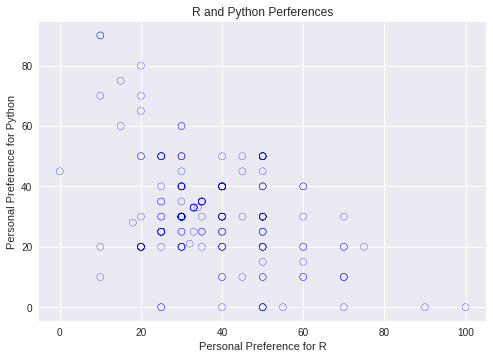

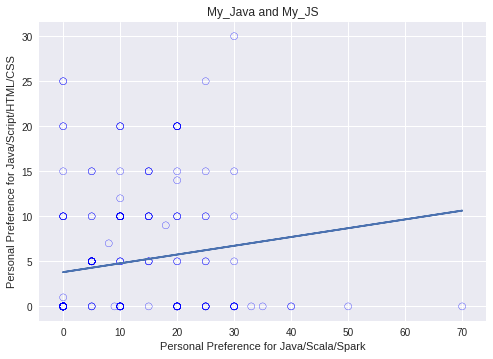

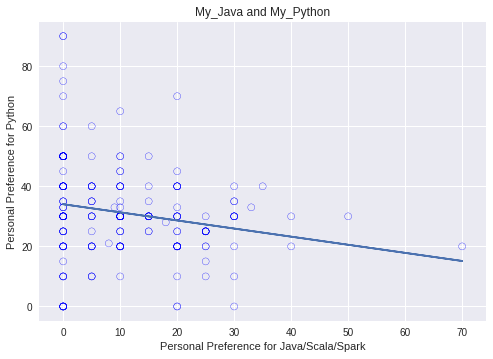

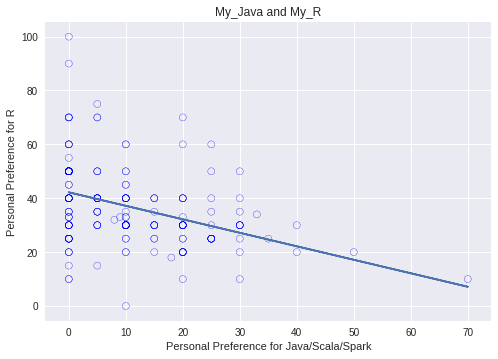

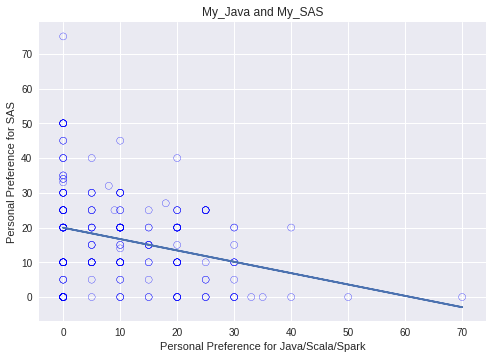

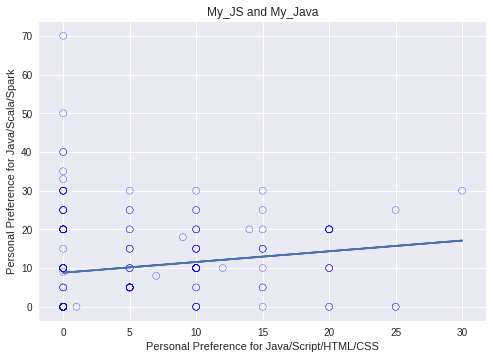

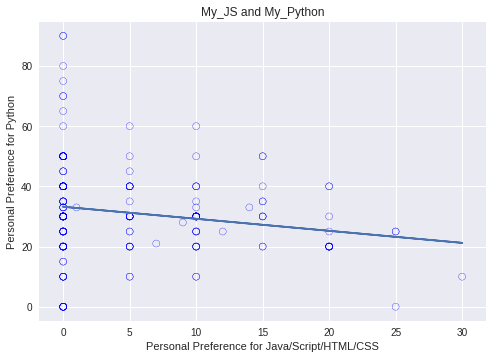

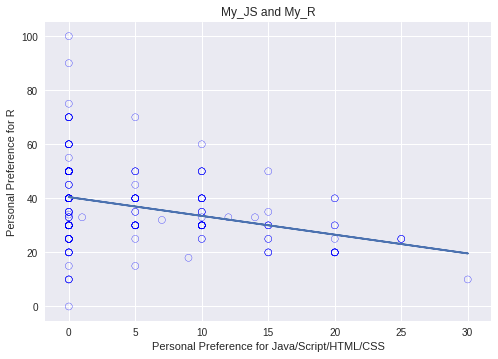

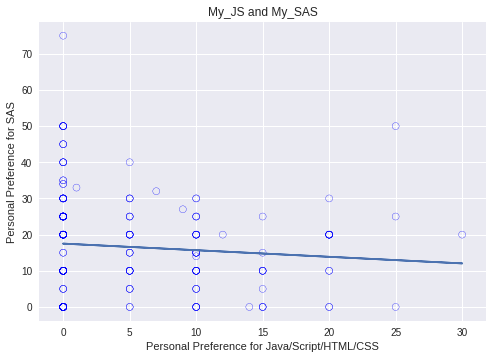

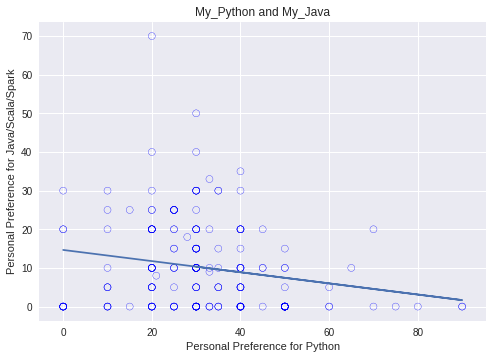

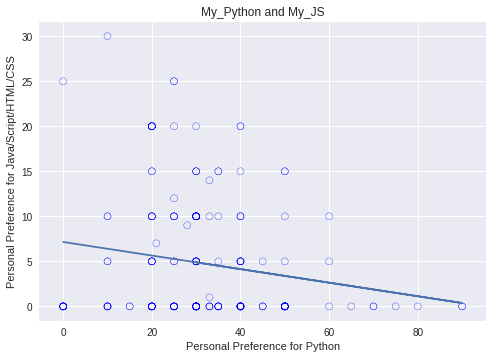

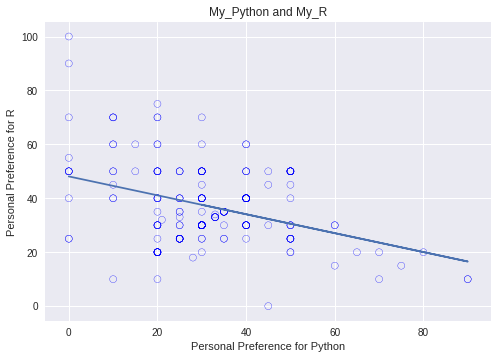

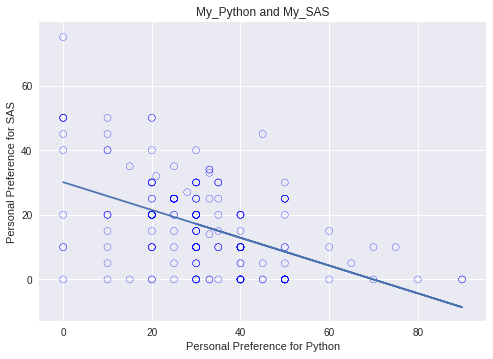

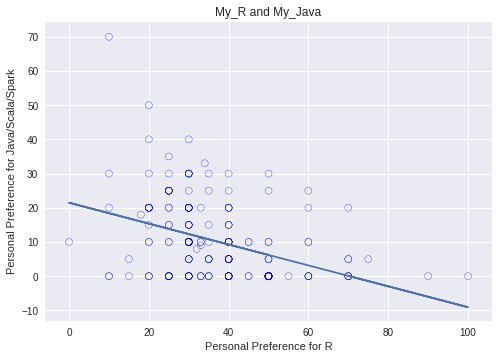

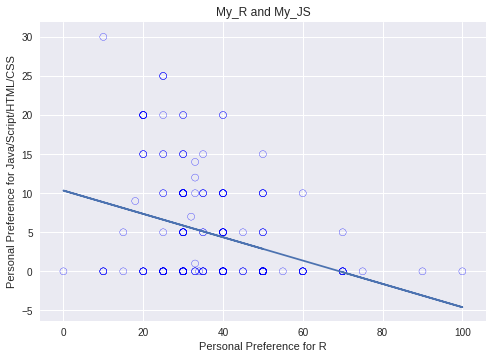

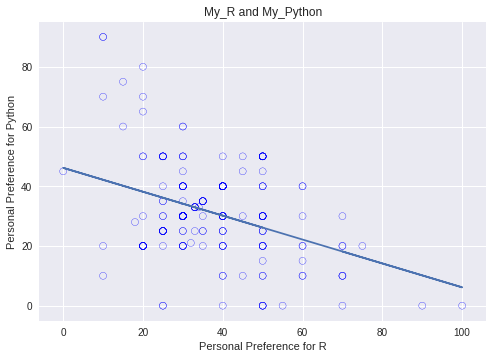

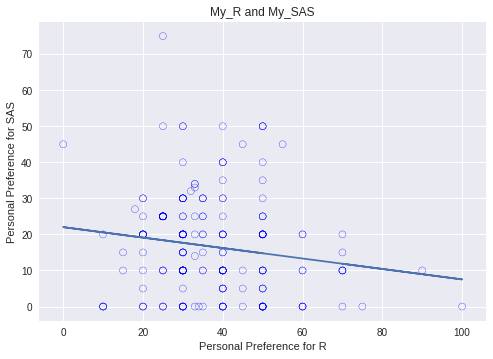

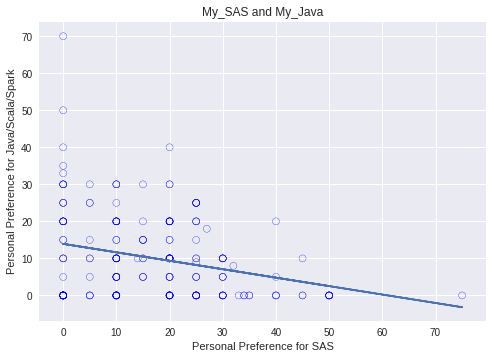

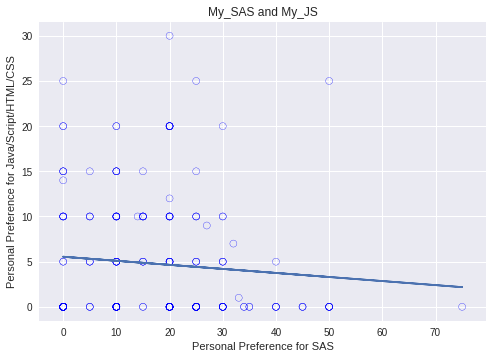

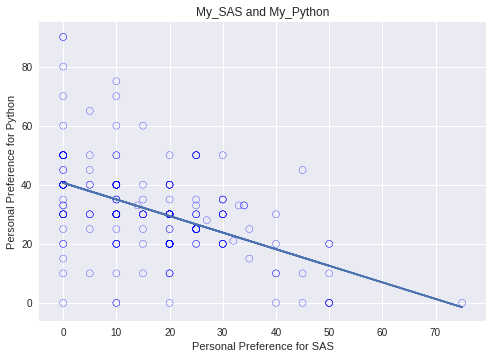

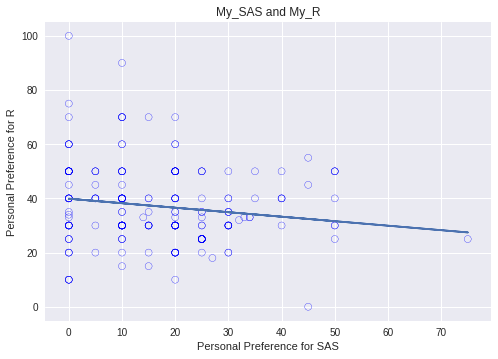

<Figure size 576x396 with 0 Axes>

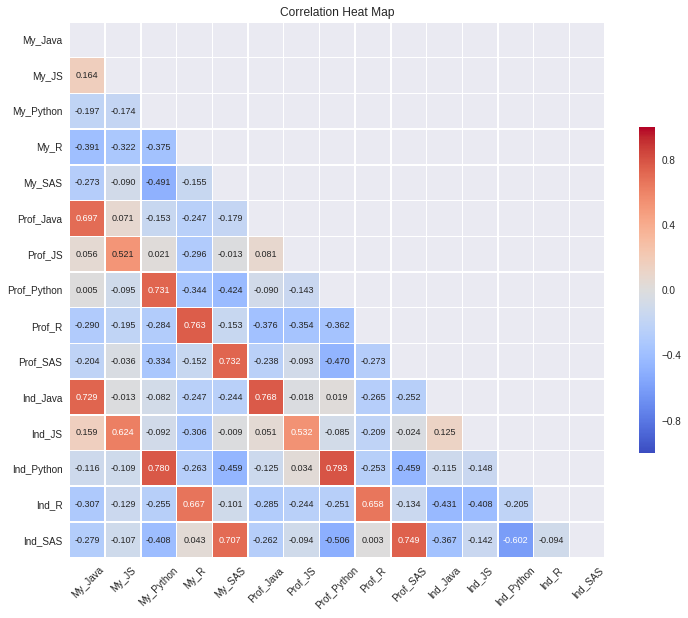

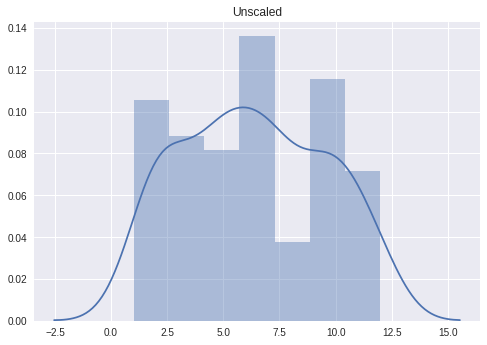

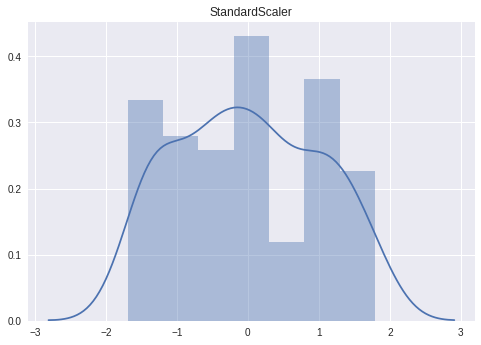

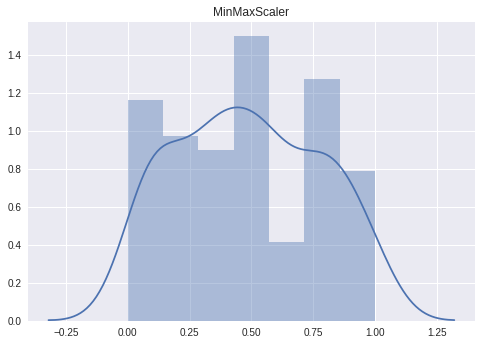

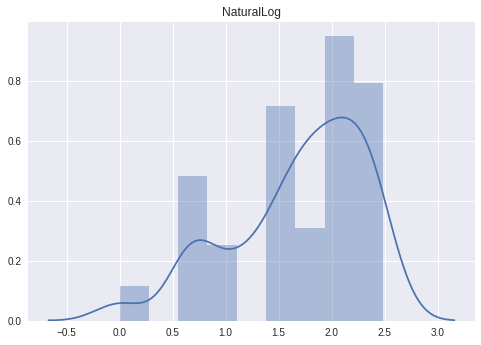

In [0]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import urllib.request
import warnings
from numpy.polynomial.polynomial import polyfit

# there are some warnings thrown which we can safely suppress
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore")

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('https://raw.githubusercontent.com/eric-pierce/MSDS-422/master/mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            # The line below  uses the polyfit function to generate a fit line for the input scatterplot data
            b, m = polyfit(survey_df[survey_df.columns[i]], survey_df[survey_df.columns[j]], 1)
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            # The line below actually plots the line on the graph
            plt.plot(survey_df[survey_df.columns[i]], b + m * survey_df[survey_df.columns[i]], '-')
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue')
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)

            # examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
# note that the notebook this exploratory analysis was based on had a bug on the 
# following line, which caused the array to be initialized as a 1D array instead of a 2D array
X = survey_df[['Courses_Completed']].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


In [0]:
survey_df.loc[survey_df.Graduate_Date.str.contains("2016", na=False), 'Graduate_Year'] = 2016
survey_df.loc[survey_df.Graduate_Date.str.contains("2017", na=False), 'Graduate_Year'] = 2017
survey_df.loc[survey_df.Graduate_Date.str.contains("2018", na=False), 'Graduate_Year'] = 2018
survey_df.loc[survey_df.Graduate_Date.str.contains("2019", na=False), 'Graduate_Year'] = 2019
survey_df.loc[survey_df.Graduate_Date.str.contains("2020", na=False), 'Graduate_Year'] = 2020

Here we can look at precentage interest breakdown across graduation years to understand if tenure has a great impact on languages

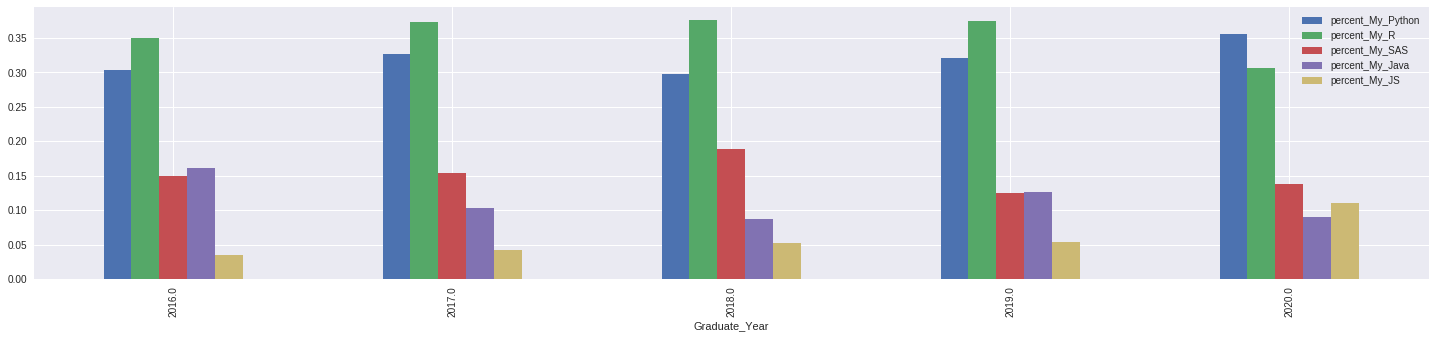

In [0]:
survey_df_barplot=survey_df[['Graduate_Year','My_Python','My_R','My_SAS','My_Java','My_JS']].groupby(['Graduate_Year']).sum()
survey_df_barplot['Total']=survey_df_barplot.sum(axis=1)
survey_df_barplot['percent_My_Python'] = (survey_df_barplot['My_Python']/survey_df_barplot['Total'])
survey_df_barplot['percent_My_R'] = (survey_df_barplot['My_R']/survey_df_barplot['Total'])
survey_df_barplot['percent_My_SAS'] = (survey_df_barplot['My_SAS']/survey_df_barplot['Total'])
survey_df_barplot['percent_My_Java'] = (survey_df_barplot['My_Java']/survey_df_barplot['Total'])
survey_df_barplot['percent_My_JS'] = (survey_df_barplot['My_JS']/survey_df_barplot['Total'])
survey_df_barplot[['percent_My_Python','percent_My_R','percent_My_SAS','percent_My_Java','percent_My_JS']].plot.bar(figsize=(25,5))
plt.show()

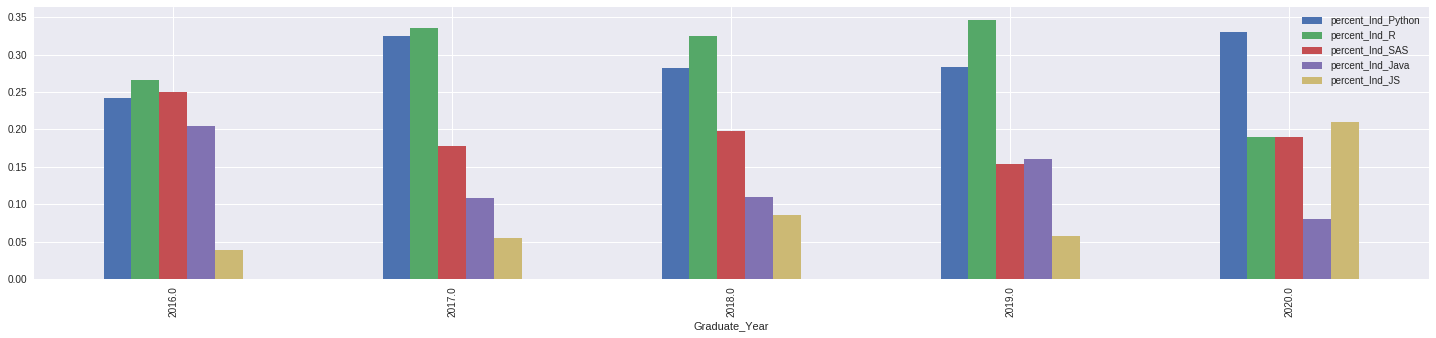

In [0]:
survey_df_barplot=survey_df[['Graduate_Year','Ind_Python','Ind_R','Ind_SAS','Ind_Java','Ind_JS']].groupby(['Graduate_Year']).sum()
survey_df_barplot['Total']=survey_df_barplot.sum(axis=1)
survey_df_barplot['percent_Ind_Python'] = (survey_df_barplot['Ind_Python']/survey_df_barplot['Total'])
survey_df_barplot['percent_Ind_R'] = (survey_df_barplot['Ind_R']/survey_df_barplot['Total'])
survey_df_barplot['percent_Ind_SAS'] = (survey_df_barplot['Ind_SAS']/survey_df_barplot['Total'])
survey_df_barplot['percent_Ind_Java'] = (survey_df_barplot['Ind_Java']/survey_df_barplot['Total'])
survey_df_barplot['percent_Ind_JS'] = (survey_df_barplot['Ind_JS']/survey_df_barplot['Total'])
survey_df_barplot[['percent_Ind_Python','percent_Ind_R','percent_Ind_SAS','percent_Ind_Java','percent_Ind_JS']].plot.bar(figsize=(25,5))
plt.show()

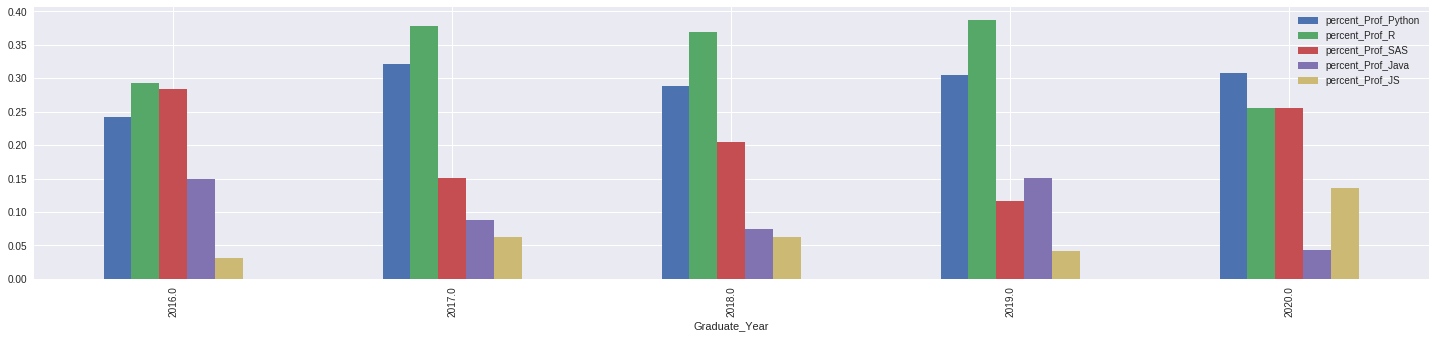

In [0]:
survey_df_barplot=survey_df[['Graduate_Year','Prof_Python','Prof_R','Prof_SAS','Prof_Java','Prof_JS']].groupby(['Graduate_Year']).sum()
survey_df_barplot['Total']=survey_df_barplot.sum(axis=1)
survey_df_barplot['percent_Prof_Python'] = (survey_df_barplot['Prof_Python']/survey_df_barplot['Total'])
survey_df_barplot['percent_Prof_R'] = (survey_df_barplot['Prof_R']/survey_df_barplot['Total'])
survey_df_barplot['percent_Prof_SAS'] = (survey_df_barplot['Prof_SAS']/survey_df_barplot['Total'])
survey_df_barplot['percent_Prof_Java'] = (survey_df_barplot['Prof_Java']/survey_df_barplot['Total'])
survey_df_barplot['percent_Prof_JS'] = (survey_df_barplot['Prof_JS']/survey_df_barplot['Total'])
survey_df_barplot[['percent_Prof_Python','percent_Prof_R','percent_Prof_SAS','percent_Prof_Java','percent_Prof_JS']].plot.bar(figsize=(25,5))
plt.show()

Overall Histogram of interest

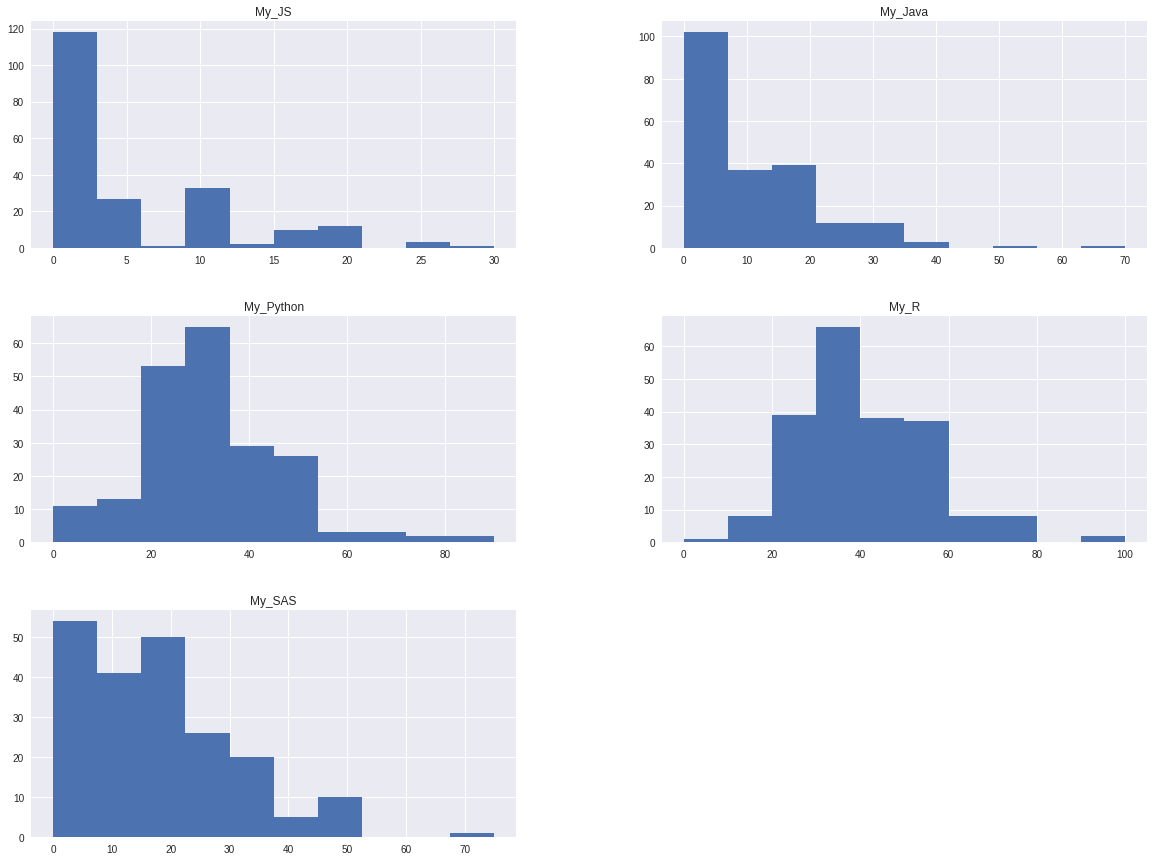

In [0]:
%matplotlib inline

survey_df_hist = survey_df[['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

2016 Interest Histogram

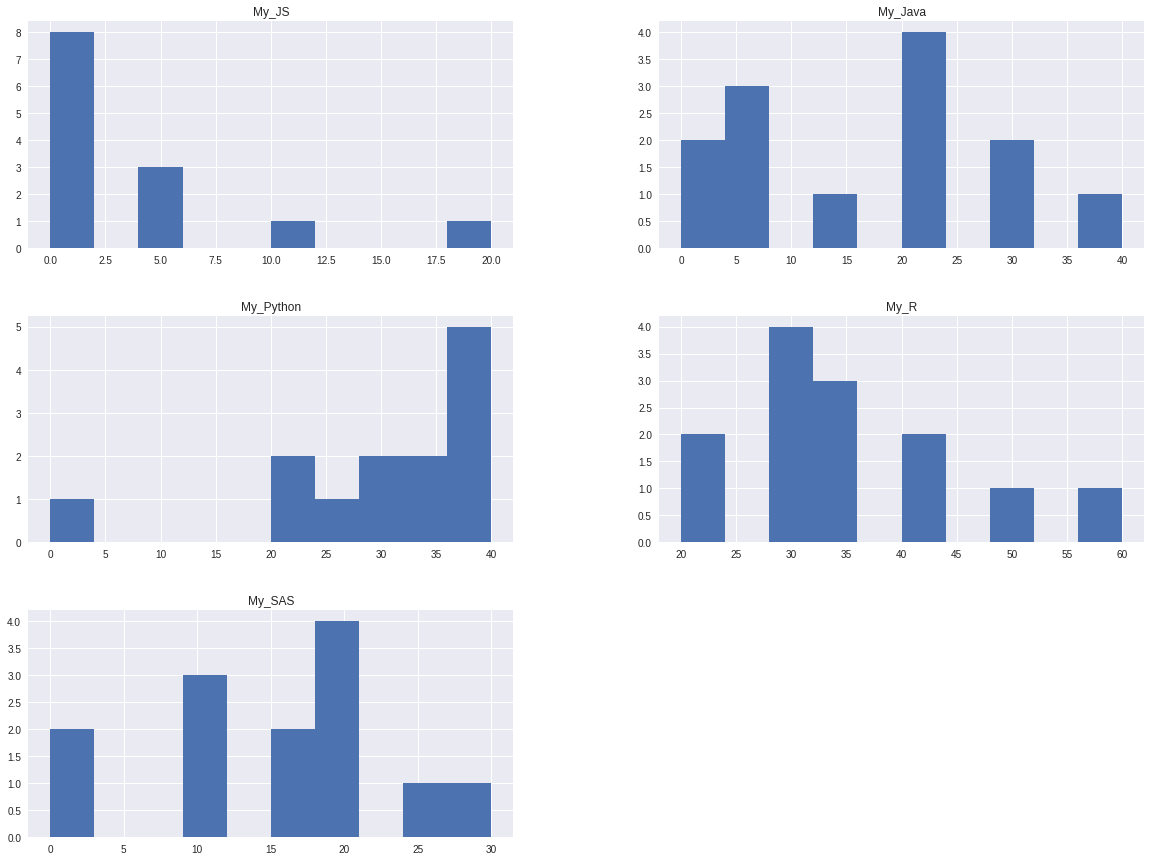

In [0]:
survey_df_hist = survey_df[survey_df.Graduate_Year == 2016][['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

2017 Interest Histogram

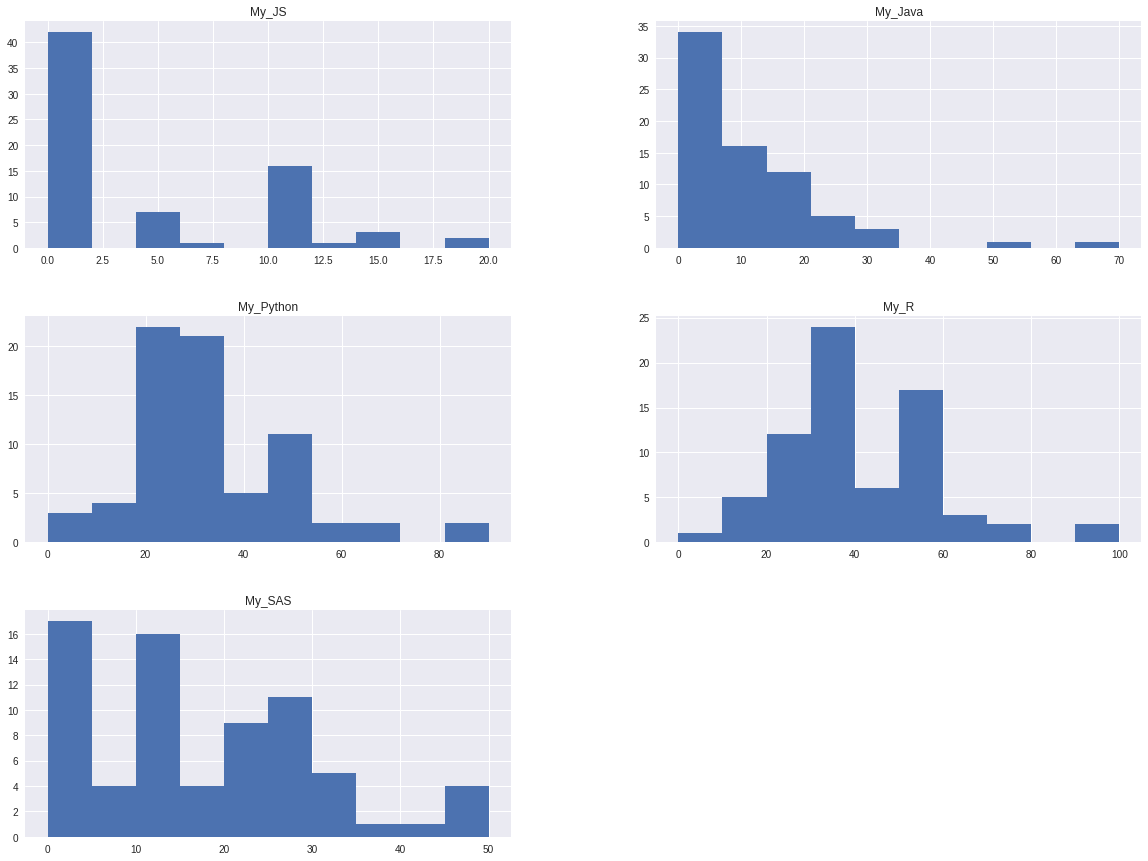

In [0]:
survey_df_hist = survey_df[survey_df.Graduate_Year == 2017][['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

2018 Interest Histogram

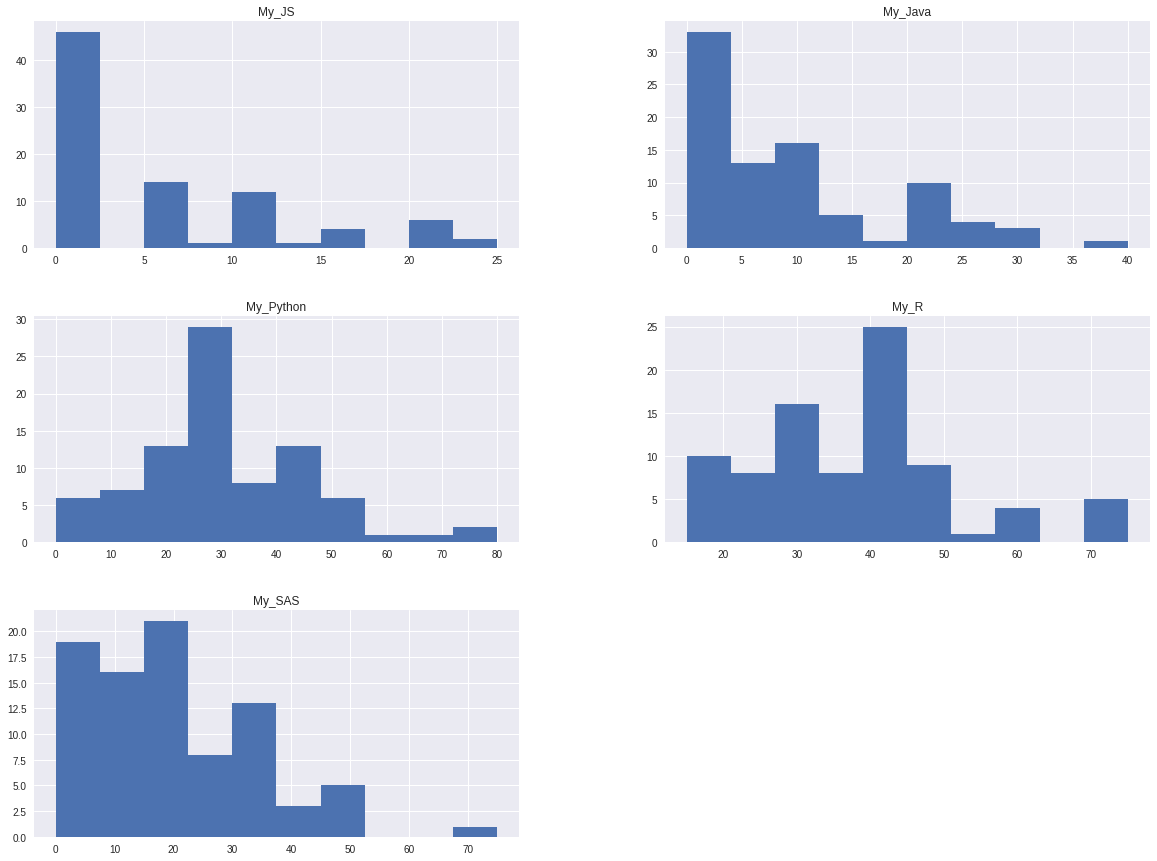

In [0]:
survey_df_hist = survey_df[survey_df.Graduate_Year == 2018][['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

2019 Interest Histogram

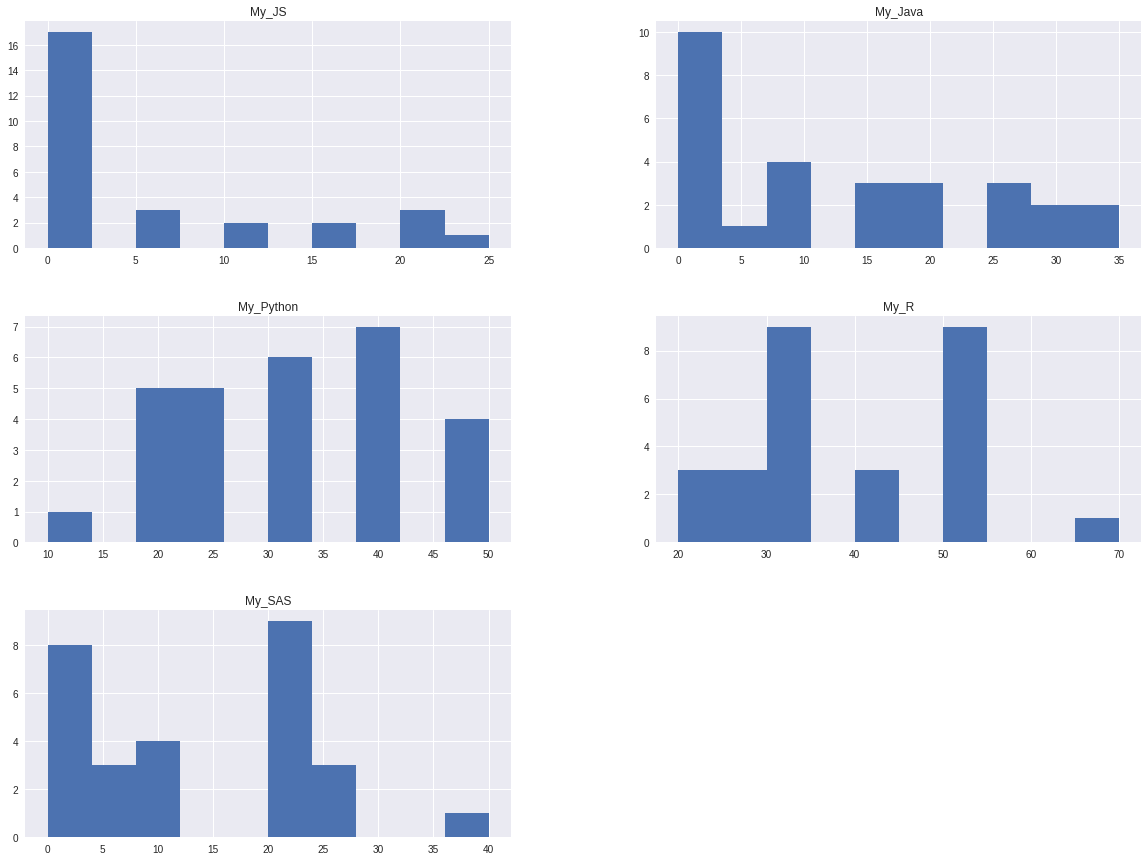

In [0]:
survey_df_hist = survey_df[survey_df.Graduate_Year == 2019][['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

2020+ Interest Histogram

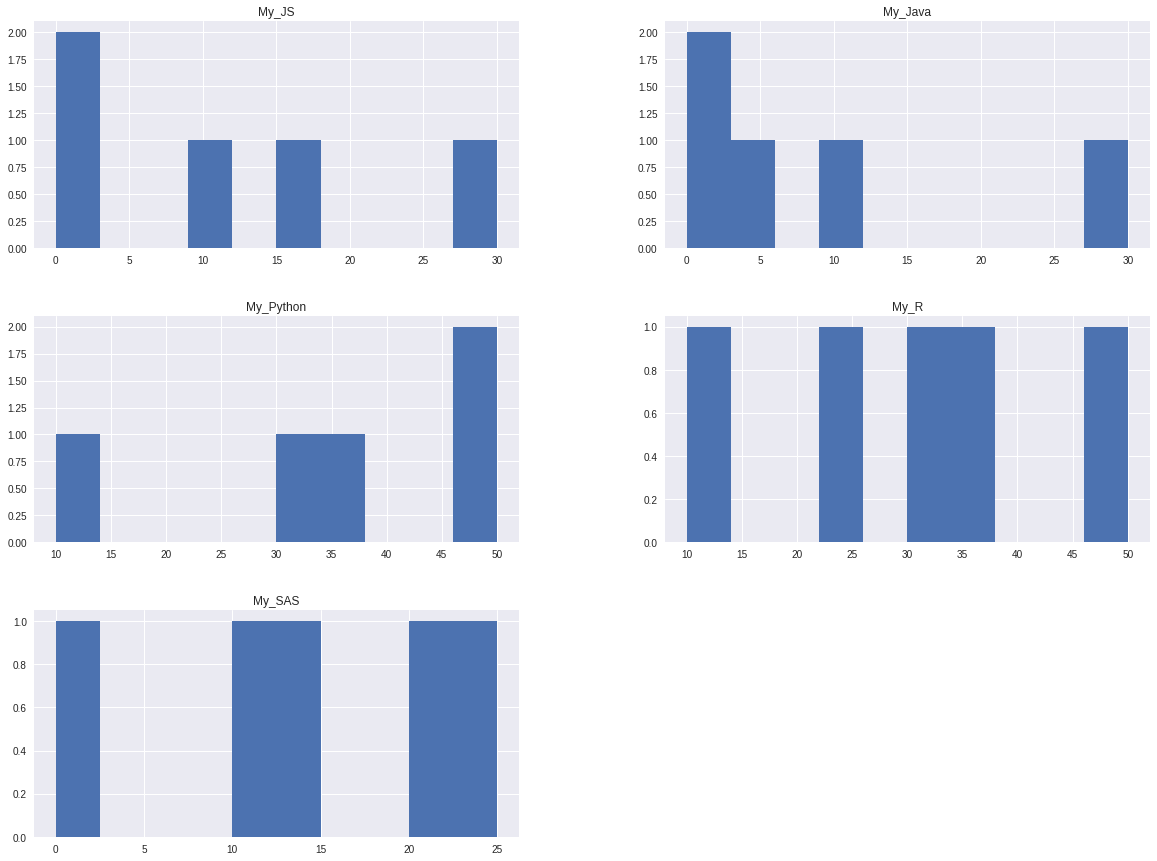

In [0]:
survey_df_hist = survey_df[survey_df.Graduate_Year == 2020][['My_Python','My_R','My_SAS','My_Java','My_JS']]
survey_df_hist.hist(figsize=(20,15))
plt.show()

Let's take a look at course interest by topic

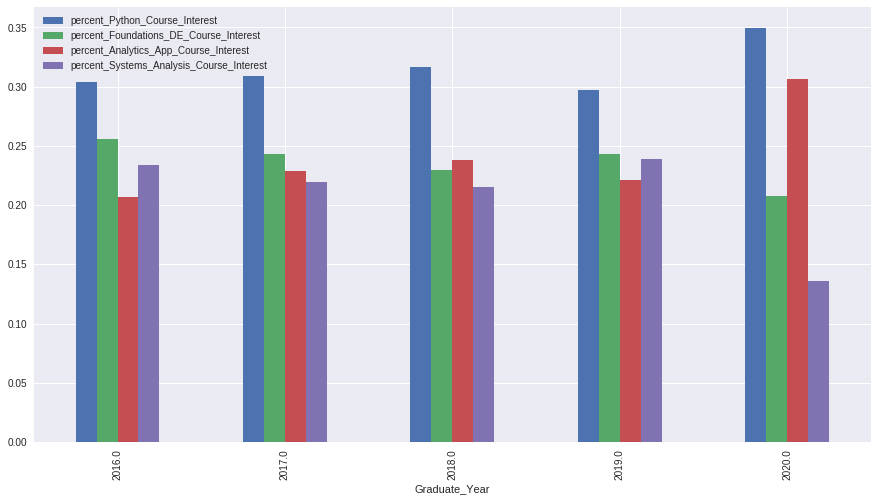

In [0]:
survey_df_barplot=survey_df[['Graduate_Year','Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest']].groupby(['Graduate_Year']).sum()
survey_df_barplot['Total']=survey_df_barplot.sum(axis=1)
survey_df_barplot['percent_Python_Course_Interest'] = (survey_df_barplot['Python_Course_Interest']/survey_df_barplot['Total'])
survey_df_barplot['percent_Foundations_DE_Course_Interest'] = (survey_df_barplot['Foundations_DE_Course_Interest']/survey_df_barplot['Total'])
survey_df_barplot['percent_Analytics_App_Course_Interest'] = (survey_df_barplot['Analytics_App_Course_Interest']/survey_df_barplot['Total'])
survey_df_barplot['percent_Systems_Analysis_Course_Interest'] = (survey_df_barplot['Systems_Analysis_Course_Interest']/survey_df_barplot['Total'])
survey_df_barplot[['percent_Python_Course_Interest','percent_Foundations_DE_Course_Interest','percent_Analytics_App_Course_Interest','percent_Systems_Analysis_Course_Interest']].plot.bar(figsize=(15,8))
plt.show()